In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from pathlib import Path
import sys
sys.path.append(str(Path.cwd() / "_scripts"))

In [4]:
import seaborn as sns
import seaborn.objects as so
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.axes import Axes

from eppy.bunch_subclass import EpBunch

from helpers.ep_helpers import PARTNER
from helpers.variable_interfaces import all_variables as vars
from setup.materials_setup import retrieve_cases
from setup.data_wrangle2 import *
from analysis.helpers import map_zone_names, extract_times
from analysis.plot_helpers import set_axis_ticks
# from analysis.dataframes import *
# from analysis.volumes import *

from analysis.plot_subsurfaces import *
from analysis.plot_helpers import plot_zone_domains

sns.set_style("darkgrid")
from datetime import datetime

In [5]:
cases = retrieve_cases()

In [8]:
medium_cases = [i for i in cases if "Medium" in i.case_name]
[case] = [i for i in medium_cases if "bol" in i.case_name]
case

CaseData(case_name='Medium_case_bol_5', idf=<geomeppy.idf.IDF object at 0x152f758d0>, sql=Energy SQLiteResult: /Users/julietnwagwuume-ezeoke/_UILCode/gqe-phd/geomeppy/cases/material_exp/Medium_case_bol_5/results/eplusout.sql, path_to_input=PosixPath('/Users/julietnwagwuume-ezeoke/_UILCode/gqe-phd/svg2plan/outputs2/case_bol_5'), path_to_output=PosixPath('/Users/julietnwagwuume-ezeoke/_UILCode/gqe-phd/geomeppy/cases/material_exp/Medium_case_bol_5'))

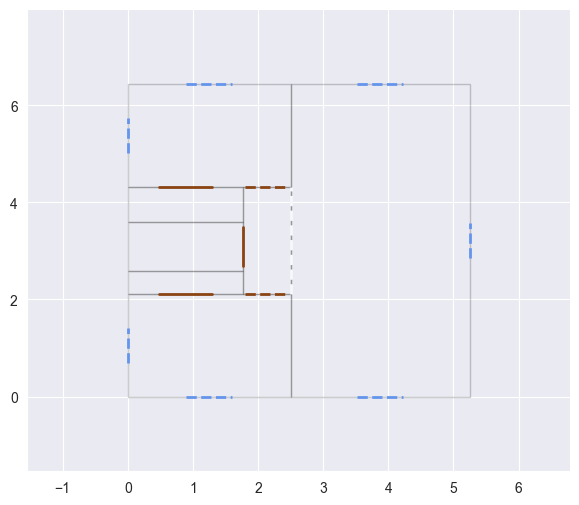

In [9]:
time = datetime(2017, 7, 1, 12, 0)
fig, ax = plt.subplots(nrows=1, figsize=(7, 6))
ax = plot_zone_domains(case.idf, ax)
ax, data = plot_surfaces(case, time, ax)
